In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle as pkl
from ani1x_dataset import ANI1xDataset

Using backend: pytorch


In [2]:
# Load data

test_dataset = ANI1xDataset(mode='test')

with open('plot_data.pkl', 'rb') as f:
    data = pkl.load(f)

Loading dataset


mean 3.63 , 4.67
wider 3.26 , 4.19
basic 2.91 , 4.26
heads 2.86 , 3.96
higher 2.62 , 3.83
deeper 2.38 , 3.32


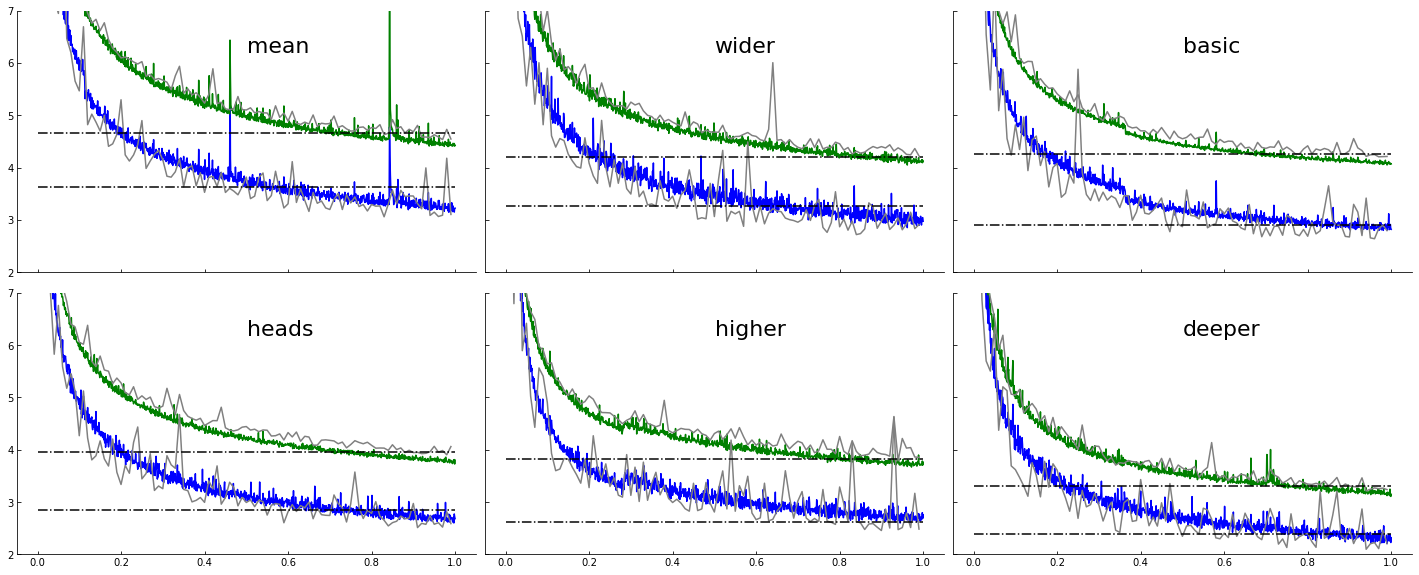

In [3]:
fig, ax = plt.subplots(2,3,figsize=(25,10), sharey=True, sharex=True)
axes = [ax[0,0], ax[0,1],ax[0,2],ax[1,0],ax[1,1],ax[1,2]]

colors = ['#cb997e', '#ddbea9', '#ffe8d6', '#b7b7a4', '#a5a58d', '#6b705c' ]
colors = ['black', 'grey', 'darkgrey', 'grey', 'black', 'black' ]
colors = ['blue', 'green', 'grey', 'grey', 'black', 'black' ]

order = ['basic', 'mean', 'deeper', 'wider', 'higher', 'heads']
order = ['mean', 'wider', 'basic', 'heads', 'higher', 'deeper']

for i, key in enumerate(order):
    train, val, test = data[key]['train'], data[key]['val'],data[key]['test']
    axes[i].plot(train['x']/1000000,train['energy'],color=colors[0])
    axes[i].plot(train['x']/1000000,train['force'],color=colors[1])

    axes[i].plot(val['x']/1000000,val['energy'],color=colors[2])
    axes[i].plot(val['x']/1000000,val['force'],color=colors[3])

    axes[i].plot(train['x']/1000000,[ test['energy'] for j in range(len(train['x']))],'-.',color=colors[4])
    axes[i].plot(train['x']/1000000,[ test['force'] for j in range(len(train['x']))],'-.',color=colors[5])

    axes[i].set_ylim(2,7)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    #axes[i].yaxis.set_ticks_position('left')
    #axes[i].xaxis.set_ticks_position('bottom')
    axes[i].tick_params(axis="x", direction="in")
    axes[i].tick_params(axis="y", direction="in")
    axes[i].text(0.5, 0.9, key, transform=axes[i].transAxes, fontsize=22,
        verticalalignment='top')
    print(key,np.round(test['energy'],2), ",", np.round(test['force'],2))
    
plt.subplots_adjust(wspace=0.02, hspace=0.08)